# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [2]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [3]:
# Your code here: split the data into training and test sets
from sklearn.model_selection import train_test_split

# Define X and y
X = ames.drop('SalePrice', axis=1)
y = ames['SalePrice']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting datasets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168,), (292,))

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [4]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

## Fit a Linear Regression on the Training Data

In [13]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression

In [14]:
# Your code here: fit the model to train data
# Initialize the Linear Regression model
linreg = LinearRegression()

# Fit the model on the training data
linreg.fit(X_train, y_train)

LinearRegression()

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [15]:
# Your code here: generate predictions for both sets
from sklearn.linear_model import LinearRegression
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [16]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Squared Error for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

print("Training Set Mean Squared Error:", mse_train)
print("Test Set Mean Squared Error:", mse_test)

Training Set Mean Squared Error: 1718265016.499917
Test Set Mean Squared Error: 2250804719.6553345


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

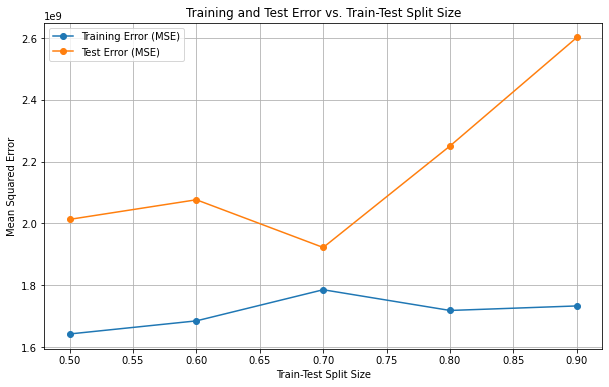

In [17]:
import matplotlib.pyplot as plt

# Define the range of train-test split sizes
split_sizes = np.linspace(0.5, 0.9, 5)
train_errors = []
test_errors = []

for size in split_sizes:
    # Generate train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Apply preprocessing
    X_train = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)
    
    X_test = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate errors
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(mse_train)
    test_errors.append(mse_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(split_sizes, train_errors, marker='o', label='Training Error (MSE)')
plt.plot(split_sizes, test_errors, marker='o', label='Test Error (MSE)')
plt.xlabel('Train-Test Split Size')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error vs. Train-Test Split Size')
plt.legend()
plt.grid(True)
plt.show()


### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

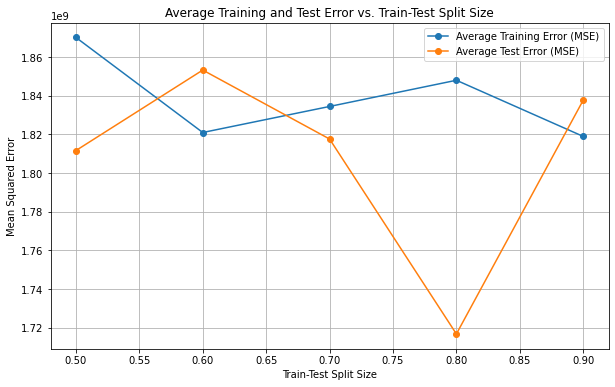

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the range of train-test split sizes
split_sizes = np.linspace(0.5, 0.9, 5)
average_train_errors = []
average_test_errors = []
n_iterations = 10

for size in split_sizes:
    train_errors = []
    test_errors = []
    
    for _ in range(n_iterations):
        # Generate train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=None)
        
        # Apply preprocessing
        X_train = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
            pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
        ], axis=1)
        
        X_test = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
            pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
        ], axis=1)
        
        # Fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict and calculate errors
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        
        train_errors.append(mse_train)
        test_errors.append(mse_test)
    
    # Average the errors across iterations
    average_train_errors.append(np.mean(train_errors))
    average_test_errors.append(np.mean(test_errors))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(split_sizes, average_train_errors, marker='o', label='Average Training Error (MSE)')
plt.plot(split_sizes, average_test_errors, marker='o', label='Average Test Error (MSE)')
plt.xlabel('Train-Test Split Size')
plt.ylabel('Mean Squared Error')
plt.title('Average Training and Test Error vs. Train-Test Split Size')
plt.legend()
plt.grid(True)
plt.show()


What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.